In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

1.7320508075688772
2.9999999999999996
1.0
3.0
3.4641016151377544
11.999999999999998
2.0
6.0
5.196152422706632
27.0
3.0
9.0
1.7320508075688772
2.9999999999999996
1.0
3.0
3.4641016151377544
11.999999999999998
2.0
6.0
1.7320508075688772
2.9999999999999996
1.0
3.0


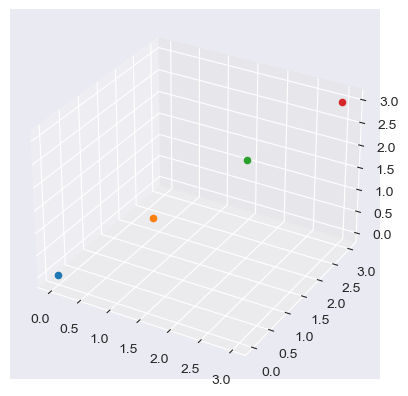

In [4]:
# 1.3.1

fig = plt.figure()
axes = fig.add_subplot(111, projection = "3d")

dots = []
for i in range(4):
    dots.append(np.array([i for k in range(3)]))
    x, y, z = dots[i]
    axes.scatter(x, y, z)

for i in range(len(dots)):
    for k in range(len(dots) - i - 1):
        print(np.linalg.norm(dots[i] - dots[k + i + 1]))
        print(np.linalg.norm(dots[i] - dots[k + i + 1]) ** 2)
        print(np.linalg.norm(dots[i] - dots[k + i + 1], ord=np.inf))
        print(np.linalg.norm(dots[i] - dots[k + i + 1], ord=1))

In [5]:
# 1.3.2

z = np.zeros((5, 5))
z += np.arange(5)
print(z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


### 2.3.1 Задание

###   Для предыдущего примера поэкспериментируйте с параметрами классификатора:
1.	Установите другое количество ближайших соседей (k = 1, 5, 10).
2.	Установите размер тестовой выборки 15% от всего датасета.
3.	Постройте графики и оцените качество моделей, проанализируйте результаты.


In [159]:
# 2.3.1

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


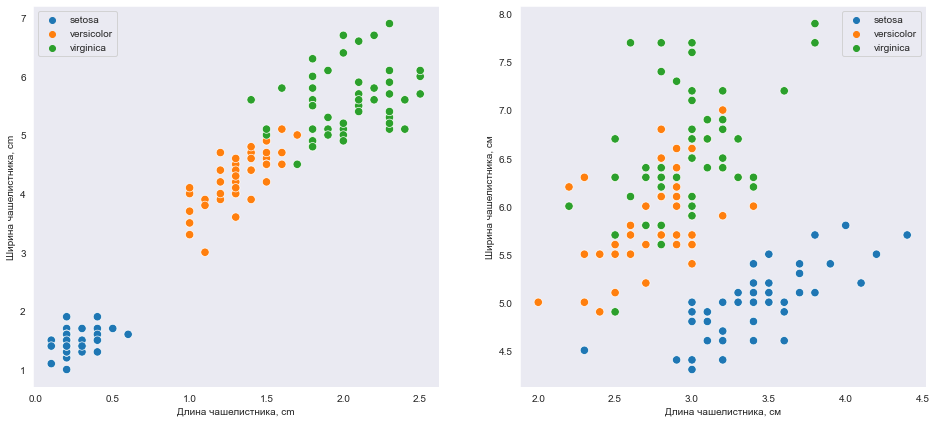

In [160]:
# 2 charts
plt.figure(figsize=(16, 7))

# 1st chart
plt.subplot(121)

sns.scatterplot(
    data=iris,
    x='petal_width', y='petal_length',
    hue='species',
    s=70
)

plt.xlabel('Длина чашелистника, cm')
plt.ylabel('Ширина чашелистника, cm')
plt.legend()
plt.grid()

# 2nd chart
plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='sepal_length', hue='species', s=70)
plt.xlabel('Длина чашелистника, см')
plt.ylabel('Ширина чашелистника, см')
plt.legend()
plt.grid();

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(

iris.iloc[:, :-1],
iris.iloc[:, -1],
test_size = 0.20
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()
y_train.head()

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array(['virginica', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

accuracy: 0.933


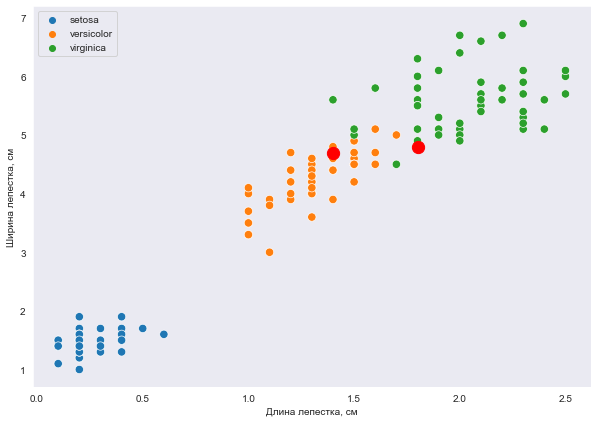

In [162]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

accuracy: 1.0


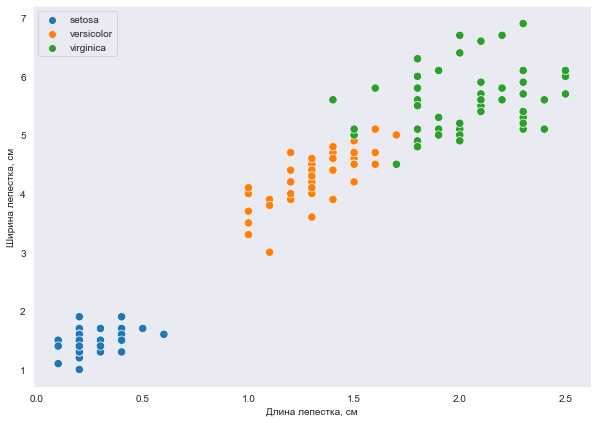

In [163]:
# 1 neighbor

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)

model1 = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train1, y_train1)

y_pred1 = model.predict(X_test1)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test1)):
    if np.array(y_test1)[i] != y_pred1[i]:
        plt.scatter(X_test1.iloc[i, 3], X_test1.iloc[i, 2], color='red', s=150)

from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test1, y_pred1) :.3}')

accuracy: 0.957


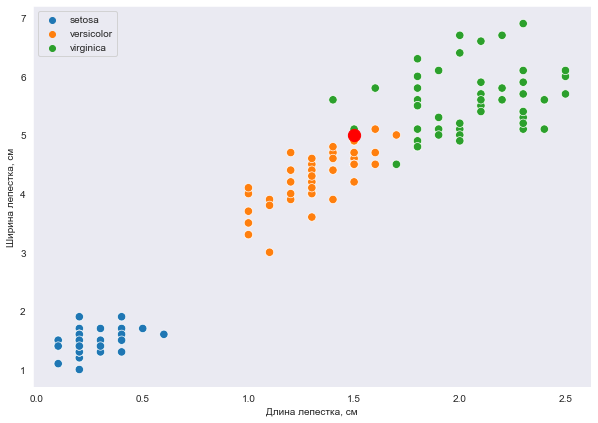

In [164]:
# 5 neighbors

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)

model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train2, y_train2)

y_pred2 = model.predict(X_test2)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test2)):
    if np.array(y_test2)[i] != y_pred2[i]:
        plt.scatter(X_test2.iloc[i, 3], X_test2.iloc[i, 2], color='red', s=150)

from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test2, y_pred2) :.3}')

accuracy: 0.913


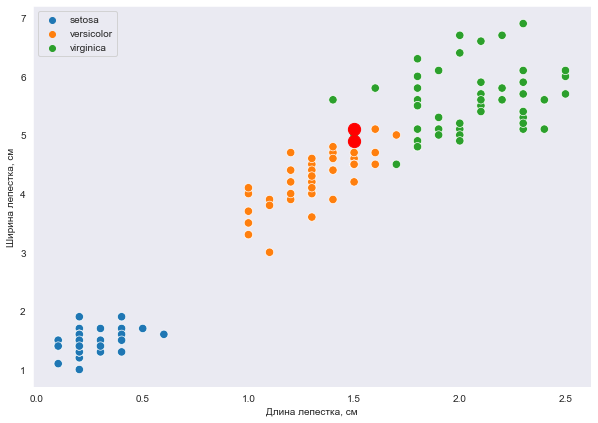

In [165]:
# 10 neighbors

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)

model3 = KNeighborsClassifier(n_neighbors=10)
model3.fit(X_train3, y_train3)

y_pred3 = model.predict(X_test3)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test3)):
    if np.array(y_test3)[i] != y_pred3[i]:
        plt.scatter(X_test3.iloc[i, 3], X_test3.iloc[i, 2], color='red', s=150)

from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test3, y_pred3) :.3}')

In [166]:
# 3.3.2

import pandas as pd

dataframe = pd.DataFrame({"оценка": ["низкая","низкая", "средняя","средняя", "высокая"]})
scale_mapper = {"низкая":1, "средняя":2, "высокая":3}

#
dataframe["оценка"].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: оценка, dtype: int64

In [167]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{"красный": 2, "синий": 4},
             {"красный": 4, "синий": 3},
             {"красный": 1, "желтый": 2},
             {"красный": 2, "желтый": 2}]
dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(data_dict)
features

array([[0., 2., 4.],
       [0., 4., 3.],
       [2., 1., 0.],
       [2., 2., 0.]])

In [168]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{"голубой": 1, "коричневый": 3},
             {"голубой": 1, "зеленый": 2},
             {"коричневый": 3, "зеленый": 2},
             {"коричневый":3, "серый": 4},
             {"серый":4, "голубой":1}]

dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(data_dict)
features

array([[1., 0., 3., 0.],
       [1., 2., 0., 0.],
       [0., 2., 3., 0.],
       [0., 0., 3., 4.],
       [1., 0., 0., 4.]])